# Objectif du projet:

- Réflechir à une application permettant d'utiliser les données enregistrées.

- Pour ce projet, mon idée d'application serait de reperer les aliments suceptibles de favoriser l'obésité. En effet nous savons qu'une alimentation riche en gras, en sel et en sucre, en plus de favoriser l’embonpoint et l’obésité, peuvent aussi entraîner de nombreuses maladies, telles que l’hypertension, le diabète de type 2 et/ou un taux élevé de cholestérol.

- Cette Application sera dédiée uniquement aux utilisateurs francais :
- A l'aide du code barre, ils pourront accéder aux différentes informations nutritionnelles: gras, sucre, sel, proteines, energie,fibres ect


In [1]:
#Import des librairies pour le traitement des données
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
#Connexion aux fichiers google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Ouverture du fichier
opendata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P3/dfp3.csv', sep=";")

<ipython-input-3-c0e8958b34f6>:2: DtypeWarning: Columns (8,9,10,11,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,35,37,38,39,44,45,47,48,50,51,52,53,54,55,59,60,61,62,67,73,76,77,78,86,89,90,91,99,109,123,130,133,139,142,143,144,146,153) have mixed types. Specify dtype option on import or set low_memory=False.
  opendata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/P3/dfp3.csv', sep=";")


# <span style='color:green'>1. NETTOYAGE DES DONNEES :</span>

In [4]:
opendata.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,8.115020e+11,http://world-fr.openfoodfacts.org/produit/0811...,drbezt,1462050158,30/04/2016 21:02:38,1462050312,30/04/2016 21:05:12,Bâtons de miel,NaN,4.9 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.115380e+11,http://world-fr.openfoodfacts.org/produit/0811...,openfoodfacts-contributors,1486293398,05/02/2017 11:16:38,1487256698,16/02/2017 14:51:38,Blacked spiced rum,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.116620e+11,http://world-fr.openfoodfacts.org/produit/0811...,openfoodfacts-contributors,1427751671,30/03/2015 21:41:11,1439141754,09/08/2015 17:35:54,mutant,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print ("Le dataset compte {} lignes et {} variables".format(opendata.shape[0], opendata.shape[1]))

Le dataset compte 297661 lignes et 162 variables


In [6]:
#pd.options.display.max_rows = None
opendata.dtypes

code                       float64
url                         object
creator                     object
created_t                    int64
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 162, dtype: object

Ici on vois clairement que certaines variables notée en objet devraient etre en float

In [7]:
opendata.describe(include='all')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,2.976110e+05,297661,297659,2.976610e+05,297660,2.976610e+05,297661,280545,52112,102858,...,53.000000,3032,160.000000,945.000000,0.0,272.000000,203236.000000,203236.000000,0.0,0.0
unique,NaN,297661,3493,NaN,184401,NaN,175610,206056,37655,13011,...,NaN,355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,http://world-fr.openfoodfacts.org/produit/0811...,usda-ndb-import,NaN,09/03/2017 10:37:09,NaN,09/08/2015 17:35:42,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,149956,NaN,20,NaN,29,363,203,4683,...,NaN,904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.421084e+12,NaN,NaN,1.469619e+09,NaN,1.478447e+09,NaN,NaN,NaN,NaN,...,6.408668,NaN,15.443750,49.533651,NaN,336.675760,9.112805,8.997505,NaN,NaN
std,7.994505e+14,NaN,NaN,3.374093e+07,NaN,2.122677e+07,NaN,NaN,NaN,NaN,...,3.786315,NaN,3.801269,18.764141,NaN,424.068509,9.055147,9.192153,NaN,NaN
min,1.000000e+00,NaN,NaN,0.000000e+00,NaN,1.332368e+09,NaN,NaN,NaN,NaN,...,0.000000,NaN,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,5.070025e+10,NaN,NaN,1.460743e+09,NaN,1.477481e+09,NaN,NaN,NaN,NaN,...,6.000000,NaN,12.000000,32.000000,NaN,85.950000,1.000000,1.000000,NaN,NaN
50%,8.500370e+11,NaN,NaN,1.489056e+09,NaN,1.489061e+09,NaN,NaN,NaN,NaN,...,7.000000,NaN,15.000000,50.000000,NaN,192.650000,10.000000,9.000000,NaN,NaN
75%,3.564700e+12,NaN,NaN,1.489077e+09,NaN,1.489092e+09,NaN,NaN,NaN,NaN,...,7.400000,NaN,15.000000,64.000000,NaN,372.900000,16.000000,16.000000,NaN,NaN


Premières Observations:

1. Ce df contient beaucoup de colonnes, pour certaines, très peu alimentées.
De nombreuse informations sont inutiles à nos besoins par exemple, les variables telles de que : "url", "creator", "created", ect..
2. En revanche, plusieurs variables seraient suceptible de nous interesser dans la poursuite de ce projet. A titre d'exemple, les variables indiquant le code barre "code" ou le pays sont très pertinentes.

Plusieurs pays sont regroupés dans la même variable, nous allons devoir effectuer un split du texte pour visualiser tout nos pays :

In [8]:
def split_words(df, column = 'countries_fr' or 'countries'):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

In [9]:
#Liste contenant tous les pays du jeu de données (bons ou mauvais)
list_countries = split_words(opendata, 'countries_fr' or 'countries')

In [10]:
print("Nombre de pays représentés : {}".format(len(list_countries)))

Nombre de pays représentés : 267


In [11]:
#Sélection des deux colonnes faisant reference à la France
countries = opendata.countries.value_counts()
countries_fr = opendata.countries_fr.value_counts()
print(countries_fr)
print(countries)

États-Unis                                  152677
France                                       93196
Suisse                                       14876
Allemagne                                     7787
Espagne                                       4979
                                             ...  
Danemark,France,États-Unis                       1
Allemagne,Suisse,Royaume-Uni                     1
Suisse,Belgien,Deutschland,Frankreich            1
Australie,France,Royaume-Uni,en:Scotland         1
France,États-Unis,en:Etats-unis                  1
Name: countries_fr, Length: 713, dtype: int64
US                                                                                                                                                                                                                                                                                                 149988
France                                                                                         

In [12]:
# Filtrage des variables dédiées à la France
#opendata = opendata[(opendata['countries_fr']=='France') | (opendata['countries']=='France')]
opendata = opendata[(opendata['countries_fr'].str.contains('France')) | (opendata['countries'].str.contains('France')) ]
pd.options.display.max_columns = None
print ("Le dataset filtré sur la France compte {} lignes et {} variables".format(opendata.shape[0], opendata.shape[1]))

Le dataset filtré sur la France compte 97173 lignes et 162 variables


Observation des variables qualitatives qui me semblent pertinentes:


*  code : constitue le code barre du produit
*  product_name : nom du produit
*  brand : marque du produit
*  nutrition_grade_fr : note à l'égard du produit en France
*  pnns_groups_1 et  pnns_groups_2: classification des produits
*  categories_fr et categories : classification francaise des produits et appelations
*  nutrition-score-fr_100g: autre classification de produit




In [13]:
pnns_groups_1=opendata.pnns_groups_1.value_counts()
pnns_groups_1


unknown                    12359
Sugary snacks               9351
Fish Meat Eggs              6683
Beverages                   6524
Milk and dairy products     6414
Cereals and potatoes        6053
Composite foods             6014
Fruits and vegetables       4058
Fat and sauces              3764
Salty snacks                2110
fruits-and-vegetables        549
sugary-snacks                470
cereals-and-potatoes           2
Name: pnns_groups_1, dtype: int64

1ère observation: la valeur "unknow" apparaît plusieurs fois dans la liste, celle-ci sera à traiter plus tard , aussi des valeur similaires écrites différement sont à grouper comme 'fruits-and-vegetables',
'sugary-snacks','cereals-and-potatoes'.

In [14]:
pnns_groups_2=opendata.pnns_groups_2.value_counts()
pnns_groups_2

unknown                             12359
One-dish meals                       4916
Biscuits and cakes                   3747
Sweets                               3401
Cereals                              3022
Cheese                               3006
Processed meat                       2886
Non-sugared beverages                2848
Dressings and sauces                 2585
Chocolate products                   2203
Fish and seafood                     2168
Alcoholic beverages                  2076
Milk and yogurt                      2074
Vegetables                           1762
Sweetened beverages                  1646
Appetizers                           1618
Fruit juices                         1520
Fruits                               1495
Meat                                 1309
Bread                                1278
Fats                                 1179
Breakfast cereals                    1105
Dairy desserts                        746
Sandwich                          

1ère observation: la valeur "unknow" apparaît plusieurs fois dans la liste, celle-ci sera à traiter plus tard , aussi des valeur similaires écrites différement sont à grouper comme 'legumes,'vegetables', 'cereal' ect

In [15]:
pnns_groups_1 = split_words(df = opendata, column = 'pnns_groups_1')
pnns_groups_2 = split_words(df = opendata, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

13 catégories sont représentées dans la variable pnns_group_1.
41 catégories sont représentées dans la variable pnns_group_2.


In [16]:
nutrition_grade_fr=opendata.nutrition_grade_fr.value_counts()
nutrition_grade_fr

d    16879
c    13066
e    11746
a    10152
b     9156
Name: nutrition_grade_fr, dtype: int64

In [17]:
categories_fr=opendata.categories_fr.value_counts()
categories_fr

Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                                                                                                                                               577
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                                                                                                                                          439
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner                                                                                                                         427
Snacks sucrés,Chocolats,Chocolats noirs                                                                                                          

In [18]:
categories=opendata.categories.value_counts()
categories

Snacks sucrés,Biscuits et gâteaux,Biscuits                                                                                                                          290
Snacks sucrés,Biscuits et gâteaux,Biscuits,Biscuits au chocolat                                                                                                     241
Biscuits                                                                                                                                                            220
Snacks sucrés,Chocolats,Chocolats noirs                                                                                                                             208
Aliments et boissons à base de végétaux,Aliments d'origine végétale,Petit-déjeuners,Céréales et pommes de terre,Céréales et dérivés,Céréales pour petit-déjeuner    206
                                                                                                                                                                

In [19]:
opendata['product_name'].value_counts()

Huile d'olive vierge extra              63
Mayonnaise                              58
Spaghetti                               52
Moutarde de Dijon                       51
Orange                                  48
                                        ..
Mouliné de 10 légumes                    1
Blédiner Croissance Légumes variés       1
Blédichet Blanquette de volaille         1
Compotes pomme nature et pomme-poire     1
Gaufres à l'Érable Biologiques           1
Name: product_name, Length: 72450, dtype: int64

A la suite de ces observations, nous ne garderons pas les variables qualitatives observées ci-avant:

categories_fr et categories : car trop nombreuses classifications, dns le cadre de la data viz, il serait compliqué de visualiser 25000 variables en même temps. Le "product name" suffit largement
nutrition-score-fr_100g: je préfère garder la classification nutrigrade_fr, car plus parlante et visible pour le public français.

Test decomplétion des variables

In [20]:
# Test de completion des variables
def test_completion(opendata):
    """
    Compute sorted completion rate and number of missing values for each variable of the argument in a descending order

    Args:
        data(dataset) : A dataset with variables

    Returns:
        A specific dataframe with completion rate for each variable.
        Schema :
            Index(string): Variable names
            Taux de completion(float): completion rate
            Nombre de valeurs manquantes(int): Number of missing values
    """
    var_dict = {}

    for col in opendata.columns:
        var_dict[col] = []
        var_dict[col].append(round((opendata[col].notna().sum()/opendata.shape[0])*100,2))
        var_dict[col].append(opendata[col].isna().sum())

    return pd.DataFrame.from_dict(data=var_dict, orient="index", columns = ["Taux de complétion", "Nombre de valeurs manquantes"]).sort_values(by="Taux de complétion", ascending=False)


In [21]:
pd.set_option('display.max_rows', 500)
test_completion(opendata)

,Taux de complétion,Nombre de valeurs manquantes
countries_tags,100.00,0
countries,100.00,0
creator,100.00,0
created_t,100.00,0
created_datetime,100.00,1
last_modified_t,100.00,0
last_modified_datetime,100.00,0
countries_fr,100.00,0
url,100.00,0
states,100.00,0


Filtrage sur le taux de complétion des variables :



In [22]:
data_not_na = opendata[opendata["product_name"].notna()
                           & opendata["brands"].notna()
                           & opendata["pnns_groups_1"].notna()
                           & opendata["pnns_groups_2"].notna()
                           & opendata["code"].notna()
                           & opendata['nutrition_grade_fr'].notna()
                          ]

print(f"Nombre d'observations où les variables sélectionnées sont représentées: {data_not_na.shape[0]}")
print(f"Pourcentage des observations filtrées sur l'ensemble des données: {data_not_na.shape[0]/opendata.shape[0]*100:.2f}%")


Nombre d'observations où les variables sélectionnées sont représentées: 46497
Pourcentage des observations filtrées sur l'ensemble des données: 47.85%


In [23]:
completions_not_na = test_completion(data_not_na)
completions_not_na

,Taux de complétion,Nombre de valeurs manquantes
code,100.00,0
brands_tags,100.00,2
states_fr,100.00,0
states_tags,100.00,0
states,100.00,0
pnns_groups_2,100.00,0
pnns_groups_1,100.00,0
nutrition_grade_fr,100.00,0
url,100.00,0
countries_fr,100.00,0


In [24]:
filtered_data = data_not_na.loc[:, ["code",
                                    "product_name",
                                   "brands",
                                   "nutrition_grade_fr",
                                   "pnns_groups_1",
                                   "pnns_groups_2",
                                   "sodium_100g",
                                   "sugars_100g",
                                   "proteins_100g",
                                   "salt_100g",
                                   "saturated-fat_100g",
                                   "carbohydrates_100g",
                                  "fat_100g",
                                    "energy_100g"
                                   ]
                               ]
test_filtered = test_completion(filtered_data)
display(test_filtered)
print(f"Nombre d'observations restantes {filtered_data.shape[0]}")
filteres_data = filtered_data.reset_index(drop=True)

,Taux de complétion,Nombre de valeurs manquantes
code,100.00,0
product_name,100.00,0
brands,100.00,0
nutrition_grade_fr,100.00,0
pnns_groups_1,100.00,0
pnns_groups_2,100.00,0
sodium_100g,99.84,76
sugars_100g,99.84,76
proteins_100g,99.84,76
salt_100g,99.84,76


Nombre d'observations restantes 46497


# Suppression des valeurs abérrantes

In [25]:
filtered_data["proteins_100g"] = [float(str(i).replace(",", ".")) for i in filtered_data["proteins_100g"]]
filtered_data["sugars_100g"]= [float(str(i).replace(",", ".")) for i in filtered_data["sugars_100g"]]
filtered_data["fat_100g"] = [float(str(i).replace(",", ".")) for i in filtered_data["fat_100g"]]
filtered_data["saturated-fat_100g"] = [float(str(i).replace(",", ".")) for i in filtered_data["saturated-fat_100g"]]
filtered_data["carbohydrates_100g"] = [float(str(i).replace(",", ".")) for i in filtered_data["carbohydrates_100g"]]
filtered_data["sodium_100g"] = [float(str(i).replace(",", ".")) for i in filtered_data["sodium_100g"]]
filtered_data["salt_100g"] = [float(str(i).replace(",", ".")) for i in filtered_data["salt_100g"]]
filtered_data["energy_100g"] = [float(str(i).replace(",", ".")) for i in filtered_data["energy_100g"]]

In [26]:
#D'après la nomenclature des données, les variables nutritionnelles mesurées en grammes (variables dont le nom se termine par _100g hormis energy_100g)
#ne peuvent pas avoir des valeurs supérrieures à 100. visualisons ces données avant de les supprimer.
outliers_100g = filtered_data[(filtered_data["proteins_100g"] > 100)
                              | (filtered_data["sugars_100g"] > 100)
                              | (filtered_data["fat_100g"] > 100)
                              | (filtered_data["saturated-fat_100g"] > 100)
                              | (filtered_data["carbohydrates_100g"] > 100)
                              | (filtered_data["sodium_100g"] > 100)
                              | (filtered_data["salt_100g"] > 100)
                              | (filtered_data["proteins_100g"] < 0)
                              | (filtered_data["sugars_100g"] < 0)
                              | (filtered_data["fat_100g"] < 0)
                              | (filtered_data["saturated-fat_100g"] < 0)
                              | (filtered_data["carbohydrates_100g"] < 0)
                              | (filtered_data["sodium_100g"] < 0)
                              | (filtered_data["salt_100g"] < 0)
                              ]

print(f"Nombre d'observations avec une ou plusieurs valeurs supérieures à 100 sur les variables nutritionnelles: {outliers_100g.shape[0]}")
print("20 premières valeurs aberrantes: ")
display(outliers_100g.head(10))

Nombre d'observations avec une ou plusieurs valeurs supérieures à 100 sur les variables nutritionnelles: 9
20 premières valeurs aberrantes: 


,code,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,sodium_100g,sugars_100g,proteins_100g,salt_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,energy_100g
125829,4.016249e+12,Sirop d agave pur,Allos,d,unknown,unknown,0.039370,103.5,1.0,0.10000,0.10,103.5,1.0,1760.0
152946,3.445850e+12,Sel de Guérande Label Rouge,Le guerandais,c,unknown,unknown,49.212598,0.0,0.0,125.00000,0.00,0.0,0.0,0.0
172976,3.161712e+12,Caprice des dieux,Caprice des Dieux,d,Milk and dairy products,Cheese,0.551181,-0.1,15.3,1.40000,21.00,0.8,30.0,1379.0
179880,3.229821e+12,Sirop d'Agave brun bio,Bjorg,d,unknown,unknown,0.055100,104.0,0.0,0.14000,0.00,104.0,0.0,1760.0
187912,3.423720e+12,Keeny Bio,Bio Soleil,e,Sugary snacks,Biscuits and cakes,83.000000,26.7,6.3,211.00000,3.33,47.8,23.0,1720.0
189123,3.473710e+12,Palets pur beurre,Georges Blanc,e,Sugary snacks,Biscuits and cakes,0.512000,52.0,10.0,1.30048,35.50,106.0,52.0,3925.0
195175,3.596710e+12,mini choux goût fromage de chèvre - poivre,Auchan,e,Salty snacks,Appetizers,3.670000,22.7,0.0,9.33000,210.00,190.0,380.0,18700.0
216750,8.032943e+12,Graine de couscous moyen,La méditerranéa,a,Cereals and potatoes,Cereals,0.003937,2.5,12.0,0.01000,0.30,70.0,105.0,1482.0
235535,8.935001e+12,Banane sèche,Vinawang,c,Fruits and vegetables,Dried fruits,0.000000,41.5,5.0,0.00000,0.00,139.0,0.0,1259.0


In [27]:
# supression des résultats ayant des valeurs supérieures à 100 et inférieures à 0
filtered_data.drop(axis=0, index=outliers_100g.index, inplace=True)
print(f"nombre de lignes  restantes {filtered_data.shape[0]}")

nombre de lignes  restantes 46488


<ipython-input-28-0545a0cfc7ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data["energy_100g"])


<Axes: xlabel='energy_100g', ylabel='Density'>

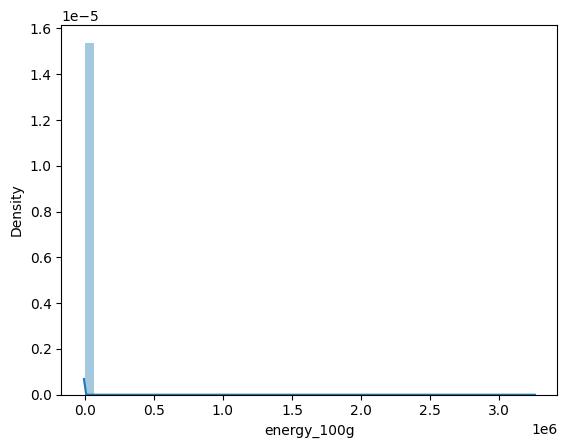

In [28]:
sns.distplot(filtered_data["energy_100g"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=e9d544586a6d2408798c54b29e94cfffb88d00599f5ca49c7032b570c4334727
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


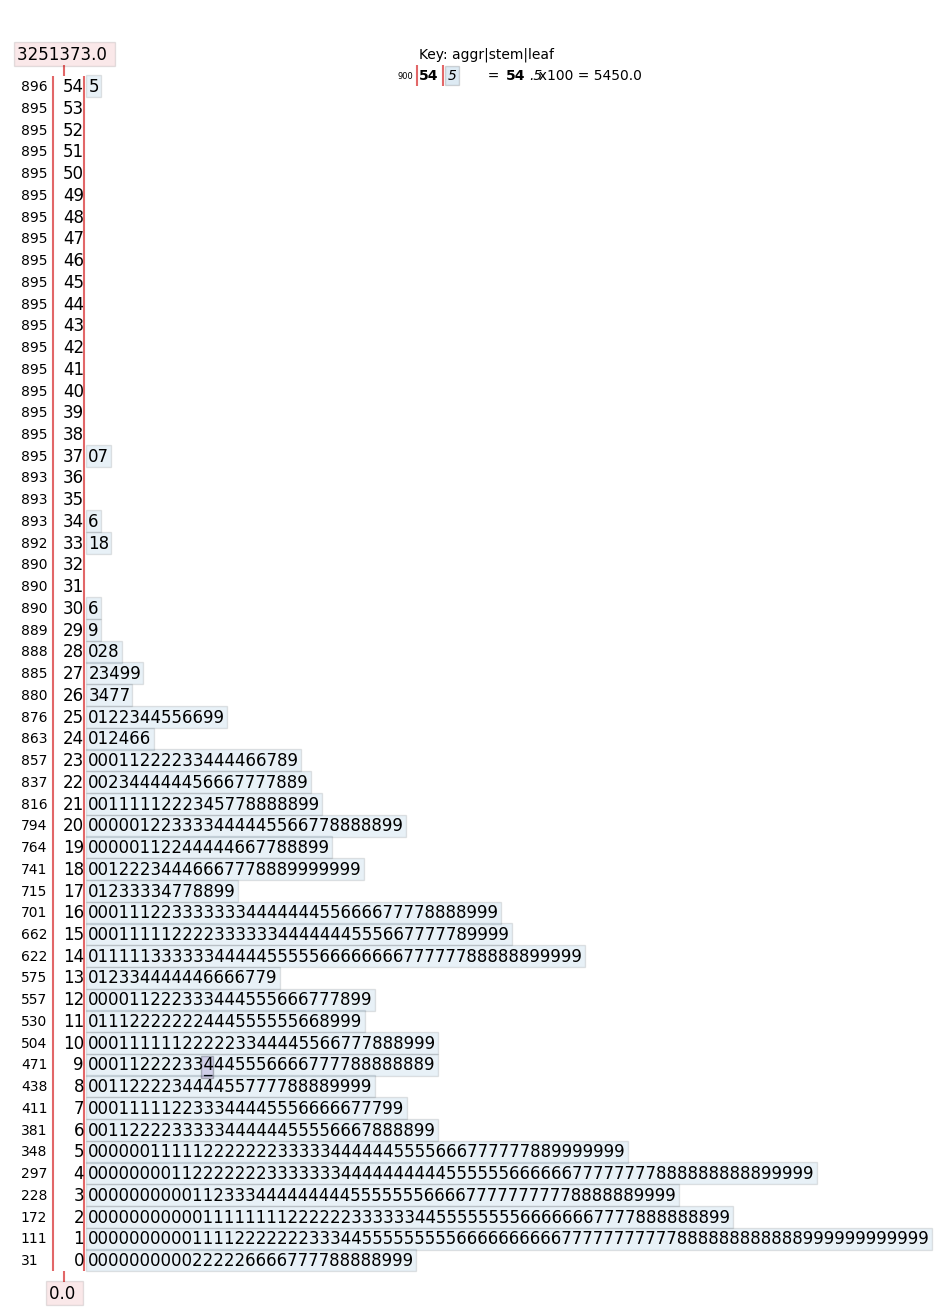

In [29]:
!pip install stemgraphic
import stemgraphic
fig, ax = stemgraphic.stem_graphic(filtered_data["energy_100g"])

On peut en déduire que les valeurs sur la variable au dessus de 3000 sont aberrantes. Visualison le nombre des observations dans ce cas de figure et affichons en le premières.

In [30]:
energy_outliers = filtered_data[filtered_data["energy_100g"] > 3000]
print(f"Nombre d'observations ayant des valeurs aberrantes sur la variable energy_100g: {energy_outliers.shape[0]}")
print("20 premières valeurs aberrantes sur la variable energy_100g")
display(energy_outliers.head(10))

Nombre d'observations ayant des valeurs aberrantes sur la variable energy_100g: 687
20 premières valeurs aberrantes sur la variable energy_100g


,code,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,sodium_100g,sugars_100g,proteins_100g,salt_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,energy_100g
17273,4.110156e+11,extra virgin cocos,Aman prana,d,Fat and sauces,Fats,0.000000,0.0,0.0,0.00,92.1,0.0,100.0,3768.0
105701,3.257983e+12,Pois cassés,Cora,b,unknown,unknown,0.003937,2.5,22.7,0.01,0.2,48.2,1.2,3251373.0
110888,2.042996e+07,Huile de noisette,Deluxe,c,Fat and sauces,Fats,0.000000,0.0,0.0,0.00,8.0,0.0,92.0,3404.0
110893,3.245270e+12,Huile de noisette,La Tourangelle,c,Fat and sauces,Fats,0.000000,0.0,0.0,0.00,8.0,0.0,100.0,3700.0
110894,3.248653e+12,Huile de colza,Monoprix,c,Fat and sauces,Fats,0.000000,0.0,0.0,0.00,7.0,0.0,92.0,3404.0
110895,3.336590e+12,Huile vierge d'avocat,Cauvin,c,Fat and sauces,Fats,0.000000,0.0,0.0,0.00,15.0,0.0,100.0,3700.0
110896,3.445020e+12,Huile de colza,Demeter,c,Fat and sauces,Fats,0.000000,0.0,0.0,0.00,7.0,0.0,92.0,3404.0
110897,3.560071e+12,Mélanges d'huiles 4 graines,Carrefour,c,Fat and sauces,Fats,0.000000,0.0,0.0,0.00,7.0,0.0,92.0,3464.0
110898,3.336590e+12,Huile de Colza Bio,Cauvin,c,Fat and sauces,Fats,0.000000,0.0,0.0,0.00,8.0,0.0,100.0,3700.0
111190,3.113078e+12,Pignon de pin,B&S,c,Salty snacks,Nuts,0.007874,3.6,13.7,0.02,4.1,5.6,65.4,3707.0


In [31]:
filtered_data.drop(axis=0, index=energy_outliers.index, inplace=True)
filttered_data = filtered_data.reset_index(drop=True)
print(f"Nombre de lignes  restantes: {filtered_data.shape[0]}")

Nombre de lignes  restantes: 45801


# Supression lignes vides / Doublons:


In [32]:
filtered_data.head(20)

,code,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,sodium_100g,sugars_100g,proteins_100g,salt_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,energy_100g
485,36252.0,Lion Peanut x2,Sunridge,e,unknown,unknown,0.038000,57.5,2.5,0.09652,12.5,70.0,20.0,1883.0
973,40608754.0,"Pepsi, Nouveau goût !",Pepsi,e,Beverages,Sweetened beverages,0.010000,10.4,0.0,0.02540,0.0,10.4,0.0,177.0
987,87177756.0,7Up,"7Up,Pepsico",e,Beverages,Sweetened beverages,0.039370,10.4,0.0,0.10000,0.0,10.4,0.0,177.0
989,10.0,Madeleines nature,Bijou,d,Sugary snacks,Biscuits and cakes,0.259843,26.0,6.0,0.66000,2.5,55.0,23.0,1900.0
1026,30.0,Cakes Raisins,Bijou,d,Sugary snacks,Biscuits and cakes,0.255906,28.0,5.8,0.65000,2.5,56.0,19.0,1768.0
1030,31.0,Cakes aux Fruits,Bijou,d,Sugary snacks,Biscuits and cakes,0.236220,34.0,4.9,0.60000,2.0,60.0,15.0,1670.0
1046,50.0,Financiers aux Amandes,Bijou,e,Sugary snacks,Biscuits and cakes,0.216535,39.0,8.0,0.55000,10.0,51.0,23.0,1868.0
1048,51.0,Fondants Citron,Bijou,e,Sugary snacks,Biscuits and cakes,0.307087,37.0,8.1,0.78000,10.0,50.0,24.0,1896.0
1699,104.0,30 Panach' Fruits,Bijou,d,Sugary snacks,Biscuits and cakes,0.248031,31.0,5.0,0.63000,2.0,57.0,18.0,1724.0
1723,11501.0,Curiously Strong Mints,Marks & Spencer,d,unknown,unknown,0.000000,96.0,0.9,0.00000,0.5,96.0,0.5,1665.0


In [33]:
#modification des majuscules en minuscules
for col in ['product_name', "brands", "pnns_groups_1", "pnns_groups_2", "nutrition_grade_fr"]:
    filtered_data[col] = filtered_data[col].str.lower()
filtered_data.head()

,code,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,sodium_100g,sugars_100g,proteins_100g,salt_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,energy_100g
485,36252.0,lion peanut x2,sunridge,e,unknown,unknown,0.038000,57.5,2.5,0.09652,12.5,70.0,20.0,1883.0
973,40608754.0,"pepsi, nouveau goût !",pepsi,e,beverages,sweetened beverages,0.010000,10.4,0.0,0.02540,0.0,10.4,0.0,177.0
987,87177756.0,7up,"7up,pepsico",e,beverages,sweetened beverages,0.039370,10.4,0.0,0.10000,0.0,10.4,0.0,177.0
989,10.0,madeleines nature,bijou,d,sugary snacks,biscuits and cakes,0.259843,26.0,6.0,0.66000,2.5,55.0,23.0,1900.0
1026,30.0,cakes raisins,bijou,d,sugary snacks,biscuits and cakes,0.255906,28.0,5.8,0.65000,2.5,56.0,19.0,1768.0


In [34]:
#Notre jeu de données est à présent débarassé des lignes et colonnes peu complétées. Nous allons à présent rechercher et supprimer les doublons.
# Suppression des doublons en fonction du code
filtered_data.drop_duplicates(subset ="code", keep = 'last', inplace=True)

In [35]:
filtered_data[(filtered_data["product_name"].isnull()==False)
      & (filtered_data["brands"].isnull()==False)].groupby(by=["product_name","brands"])["code"].nunique().sort_values(ascending=False)

product_name              brands                                              
coca-cola                 coca-cola                                               20
tomato ketchup            heinz                                                   16
orangina                  orangina                                                14
nutella                   ferrero,nutella                                         14
nesquik                   nestlé,nesquik                                          12
                                                                                  ..
fines tartines briochées  narvik                                                   1
fines tranches            leader price                                             1
                          quorn                                                    1
fines tranches briochées  sans marque                                              1
칠성사이다                     chilsung,칠성,lotte, lotte chilsung beverage co

In [36]:
# Suppression des doublons sur marque et produit en conservant les valeurs nulles
filtered_data =filtered_data[(~filtered_data.duplicated(["product_name","brands"],keep="last"))
      | ((filtered_data['product_name'].isnull()) & (filtered_data['brands'].isnull()))]

In [37]:
filtered_data.shape

(43144, 14)

On voit ici que certaines catégories sont présentes plusieurs fois mais orthographiées différement :

'Cereals and potatoes' et 'cereals-and-potatoes'
'fruits-and-vegetables' et 'Fruits and vegetables'
...
Nous allons donc corriger le problème en passant le texte en miniscule et en remplaçant les caractères spéciaux par un espace :

In [38]:
filtered_data["pnns_groups_1"] = filtered_data["pnns_groups_1"].str.lower().str.replace('-', ' ')

<ipython-input-38-937db01c0c09>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
pnns_groups_1 = split_words(df = filtered_data, column = 'pnns_groups_1')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print(pnns_groups_1)

10 catégories sont représentées dans la variable pnns_group_1.
['fat and sauces', 'fruits and vegetables', 'unknown', 'composite foods', 'fish meat eggs', 'beverages', 'sugary snacks', 'salty snacks', 'milk and dairy products', 'cereals and potatoes']


In [40]:
filtered_data["pnns_groups_2"] = filtered_data["pnns_groups_2"].str.lower().str.replace('-', ' ').replace('pizza pies and quiche','pizza pies and quiches')
pnns_groups_2 = split_words(df = filtered_data, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

35 catégories sont représentées dans la variable pnns_group_2.


Supression des valeurs de variables pnns_groups_1 et pnns_groups_2 "unknown"
Lors des différentes opérations de nettoyage nous avons constaté que même si le taux de complétion des variables pnns_groups_1 et ppns_gourps_2 ont un taux de complétion de 100%, certaines observations ont une valeur "unknown" pour cette variable.

In [41]:
completion_pnns_1 = filtered_data["pnns_groups_1"].notna().shape[0] / filtered_data.shape[0] * 100
completion_pnns_2 = filtered_data["pnns_groups_2"].notna().shape[0] / filtered_data.shape[0] * 100
unknown_pnns_1 = filtered_data[filtered_data["pnns_groups_1"] == "unknown"].shape[0]
unknown_pnns_2 =  filtered_data[filtered_data["pnns_groups_2"] == "unknown"].shape[0]
print(f"Taux de completion de la variable 'pnns_groups_1': {completion_pnns_1}%")
print(f"Nombre d'observations où la variable 'pnns_groups_1' est 'unknown': {unknown_pnns_1}")
print(f"Taux de completion de la variable 'pnns_groups_2': {completion_pnns_2}%")
print(f"Nombre d'observations où la variable 'pnns_groups_2' est 'unknown': {unknown_pnns_2}")

Taux de completion de la variable 'pnns_groups_1': 100.0%
Nombre d'observations où la variable 'pnns_groups_1' est 'unknown': 6580
Taux de completion de la variable 'pnns_groups_2': 100.0%
Nombre d'observations où la variable 'pnns_groups_2' est 'unknown': 6580


Affin de systématiser la vérification de la présence de valeur "unknown" sur chaque variable nous créons une fonction et l'utilisons sur l'ensemble des données restantes:

In [42]:
def check_unknown(data):
    """
    Check if "unknown" value is present for some observations for each variable in the dataframe.

    Args:
        data(dataframe) : A dataframe to be checked
    Returns:
        Number of observations with an "unknow" value for each stream
    """

    unknown_dict = {}

    for col in data.columns:
        unknown_dict[col] = data[data[col] =="unknown"].shape[0]

    return pd.DataFrame.from_dict(data=unknown_dict, orient ="index", columns = ["Nombre d'observations unknown"]).sort_values(by="Nombre d'observations unknown", ascending=False)

check_unknown(filtered_data)

,Nombre d'observations unknown
pnns_groups_1,6580
pnns_groups_2,6580
code,0
product_name,0
brands,0
nutrition_grade_fr,0
sodium_100g,0
sugars_100g,0
proteins_100g,0
salt_100g,0


Il n'y a bien que les variables pnns_groups_1 et pnns_groups_2 qui ont des observations avec des valeurs "unkwown". Nous décidons de supprimer ces observations.

In [43]:
idx_to_drop = list(filtered_data[filtered_data["pnns_groups_1"] == "unknown"].index)
cleaned_data = filtered_data.drop(labels = idx_to_drop)
cleaned_data = filtered_data.reset_index(drop=True)
print(f"Nombre d'observations restantes: {cleaned_data.shape[0]}")
print("Taux de complétion après suppresion des observations")
display(test_completion(cleaned_data))
print("Cinq premières lignes des données après la nouvelle étape de nettoyage")
display(cleaned_data.head())

Nombre d'observations restantes: 43144
Taux de complétion après suppresion des observations


,Taux de complétion,Nombre de valeurs manquantes
code,100.00,0
product_name,100.00,0
brands,100.00,0
nutrition_grade_fr,100.00,0
pnns_groups_1,100.00,0
pnns_groups_2,100.00,0
sodium_100g,99.83,74
sugars_100g,99.83,74
proteins_100g,99.83,74
salt_100g,99.83,74


Cinq premières lignes des données après la nouvelle étape de nettoyage


,code,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,sodium_100g,sugars_100g,proteins_100g,salt_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,energy_100g
0,36252.0,lion peanut x2,sunridge,e,unknown,unknown,0.038000,57.5,2.5,0.09652,12.5,70.0,20.0,1883.0
1,40608754.0,"pepsi, nouveau goût !",pepsi,e,beverages,sweetened beverages,0.010000,10.4,0.0,0.02540,0.0,10.4,0.0,177.0
2,87177756.0,7up,"7up,pepsico",e,beverages,sweetened beverages,0.039370,10.4,0.0,0.10000,0.0,10.4,0.0,177.0
3,10.0,madeleines nature,bijou,d,sugary snacks,biscuits and cakes,0.259843,26.0,6.0,0.66000,2.5,55.0,23.0,1900.0
4,30.0,cakes raisins,bijou,d,sugary snacks,biscuits and cakes,0.255906,28.0,5.8,0.65000,2.5,56.0,19.0,1768.0


In [44]:
cleaned_data = cleaned_data.loc[(cleaned_data["pnns_groups_1"] != "unknown") | (cleaned_data["pnns_groups_2"] != "unknown")]
cleaned_data

,code,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,sodium_100g,sugars_100g,proteins_100g,salt_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,energy_100g
1,4.060875e+07,"pepsi, nouveau goût !",pepsi,e,beverages,sweetened beverages,0.010000,10.4,0.00,0.025400,0.0,10.4,0.0,177.0
2,8.717776e+07,7up,"7up,pepsico",e,beverages,sweetened beverages,0.039370,10.4,0.00,0.100000,0.0,10.4,0.0,177.0
3,1.000000e+01,madeleines nature,bijou,d,sugary snacks,biscuits and cakes,0.259843,26.0,6.00,0.660000,2.5,55.0,23.0,1900.0
4,3.000000e+01,cakes raisins,bijou,d,sugary snacks,biscuits and cakes,0.255906,28.0,5.80,0.650000,2.5,56.0,19.0,1768.0
5,3.100000e+01,cakes aux fruits,bijou,d,sugary snacks,biscuits and cakes,0.236220,34.0,4.90,0.600000,2.0,60.0,15.0,1670.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43137,7.241716e+10,cookies milk & hazelnut chunk sensations,"cadbury,mondelez",e,sugary snacks,biscuits and cakes,0.314961,33.8,6.50,0.800000,14.0,57.3,30.7,2228.0
43138,7.444850e+05,custard creams,simply ms,e,sugary snacks,biscuits and cakes,0.177165,28.4,5.00,0.450000,12.4,68.6,20.8,2037.0
43139,7.733057e+10,biscuits à l'avoine et aux canneberges,royal dansk,e,sugary snacks,biscuits and cakes,0.433000,29.0,5.60,1.099820,12.0,63.0,24.0,2077.0
43140,7.733057e+10,chocolate chip cookies,royal dansk,e,sugary snacks,biscuits and cakes,0.000333,36.4,6.06,0.000847,13.6,63.6,24.2,2030.0


Durant le travail de nettoyage nous avons également constaté des observations où toutes les variables nutritionnelles sont absentes.

In [45]:
all_na = cleaned_data[cleaned_data["energy_100g"].isna()
                            & cleaned_data["proteins_100g"].isna()
                            & cleaned_data["sugars_100g"].isna()
                            & cleaned_data["fat_100g"].isna()
                            & cleaned_data["saturated-fat_100g"].isna()
                            & cleaned_data["carbohydrates_100g"].isna()
                            & cleaned_data["sodium_100g"].isna()
                    ]
print(f"Nombre d'observations ayant toutes les variables nutritionnelles absentes: {all_na.shape[0]}")
print(f"Cinquante premières observations ayant toutes les variables nutritionnelles absentes")
display(all_na.head(50))

Nombre d'observations ayant toutes les variables nutritionnelles absentes: 51
Cinquante premières observations ayant toutes les variables nutritionnelles absentes


,code,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,sodium_100g,sugars_100g,proteins_100g,salt_100g,saturated-fat_100g,carbohydrates_100g,fat_100g,energy_100g
41,4.227201e+10,nouilles chinoises et légumes,amy's kitchen,b,composite foods,one dish meals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2.118729e+12,eau minérale naturelle des vosges du nord - lé...,celtic,a,beverages,non sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3.100880e+12,st yorre,st yorre,a,beverages,non sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,3.179732e+12,hépar,hépar,a,beverages,non sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,3.250390e+12,fiée des lois,sélection intermarché,a,beverages,non sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,3.250390e+12,eau minérale naturelle,luchon,a,beverages,non sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,3.257980e+12,eau minérale naturelle,cora,a,beverages,non sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,3.361730e+12,eau minérale naturelle,celtic,a,beverages,non sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,3.598090e+11,eau de source naturelle &quot;telle qu'elle&q...,source des oliviers,a,beverages,non sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,2.000000e+12,eau de source saguaro,"source romy,saguaro",a,beverages,non sugared beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
print(f"Nombre d'observations restantes: {cleaned_data.shape[0]}")
print(f"Proportion d'observation restantes sur le nombre de données initiales: {cleaned_data.shape[0] / opendata.shape[0] * 100:.2f}%")
print(f"Nombre de variables en fin de nettoyage: {cleaned_data.shape[1]}")
print("Taux de complétion des variables")
display(test_completion(cleaned_data))
cleaned_data.to_csv("cleaned_data.csv", index=False)

Nombre d'observations restantes: 36564
Proportion d'observation restantes sur le nombre de données initiales: 37.63%
Nombre de variables en fin de nettoyage: 14
Taux de complétion des variables


,Taux de complétion,Nombre de valeurs manquantes
code,100.00,0
product_name,100.00,0
brands,100.00,0
nutrition_grade_fr,100.00,0
pnns_groups_1,100.00,0
pnns_groups_2,100.00,0
sodium_100g,99.86,51
sugars_100g,99.86,51
proteins_100g,99.86,51
salt_100g,99.86,51


## Gestion des valeurs manquantes

In [59]:
# effacer les lignes = à 51
# pour le rester remplacer par methode médiane et/ou moyenne

df_tmp = cleaned_data.copy()
moyenne_fat_100g = df_tmp['fat_100g'].mean()
df_tmp['fat_100g'] = df_tmp['fat_100g'].fillna(moyenne_fat_100g)

moyenne_carbohydrates_100g = df_tmp['carbohydrates_100g'].mean()
df_tmp['carbohydrates_100g'] = df_tmp['carbohydrates_100g'].fillna(moyenne_carbohydrates_100g)

moyenne_energy_100g = df_tmp['energy_100g'].mean()
df_tmp['energy_100g'] = df_tmp['energy_100g'].fillna(moyenne_energy_100g)

df_tmp.isna().sum(axis = 0)

code                   0
product_name           0
brands                 0
nutrition_grade_fr     0
pnns_groups_1          0
pnns_groups_2          0
sodium_100g           51
sugars_100g           51
proteins_100g         51
salt_100g             51
saturated-fat_100g    51
carbohydrates_100g     0
fat_100g               0
energy_100g            0
dtype: int64

In [60]:
df_tmp.dropna(inplace=True)

In [62]:
print(f"Nombre d'observations restantes: {df_tmp.shape[0]}")
display(test_completion(df_tmp))

Nombre d'observations restantes: 36513


,Taux de complétion,Nombre de valeurs manquantes
code,100.0,0
product_name,100.0,0
brands,100.0,0
nutrition_grade_fr,100.0,0
pnns_groups_1,100.0,0
pnns_groups_2,100.0,0
sodium_100g,100.0,0
sugars_100g,100.0,0
proteins_100g,100.0,0
salt_100g,100.0,0


In [63]:
df_tmp.to_csv("df_tmp.csv", index=False)